# New York City Taxi Trip Duration

Share code and data to improve ride time predictions

---

## Contents

- First EDA
- 독립변수 수정 / 추가
- 수정 데이터 분석
- 레버리지 (Leverage)
- 아웃라이어 (Outlier)
- 스케일링
- 변수변환
- 다중공선성
- 다항회귀
- 최적화
- 교차검증
- 정규화 선형회귀
- 최적 정규화

---

## 0. Setting 

In [1]:
from taxi_pakage import *
from encoding_data import *

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


---

## 1. First EDA

- 종합 EDA
- 개별 EDA
- 독립변수(X)별 종속변수(trip_duration) EDA

### 1.1 종합 EDA

#### 1.1.1 Setting

In [2]:
# data set
taxi = pd.read_csv('train.csv')
taxi.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98,40.75,-73.99,40.74,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00,40.75,-73.97,40.80,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.96,40.77,-74.00,40.71,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98,40.75,-73.97,40.76,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.98,40.78,-73.97,40.79,N,198


#### 1.1.2 변수 의미

| Values | Meaning |
|-|-|
|id | a unique identifier for each trip |
|vendor_id | a code indicating the provider associated with the trip record |
|pickup_datetime|date and time when the meter was engaged |
|dropoff_datetime|date and time when the meter was disengaged|
|passenger_count|the number of passengers in the vehicle (driver entered value)|
|pickup_longitude|the longitude where the meter was engaged|
|pickup_latitude| the latitude where the meter was engaged|
|dropoff_longitude| the longitude where the meter was disngaged|
|dropoff_latitude| the latitude where the meter was disengaged|
|store_and_fwd_flag|This indicates whether the trip record was held in vehicle memory |
|trip_duration|duration of the trip in seconds|

#### 1.1.3 Information

In [3]:
# 데이터 크기
taxi.shape # 1,458,644개 데이터, 11개의 컬럼으로 구성

(1458644, 11)

In [4]:
# 데이터에 대한 정보 (컬럼 개수, null값 여부, 데이터 유형)
taxi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- object : id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
- int : vendor_id, passenger_count, trip_duration
- float : pickup_logitude, pickup_latitude, dropoff_logitude, dropoff_latitude

In [5]:
# Descriptive statistics
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00,1458644.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,959.49
std,0.50,1.31,0.07,0.03,0.07,0.04,5237.43
min,1.00,0.00,-121.93,34.36,-121.93,32.18,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,397.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,662.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1075.00
max,2.00,9.00,-61.34,51.88,-61.34,43.92,3526282.00


### 1.2 개별 변수 EDA

#### 1.2.1 Countplot

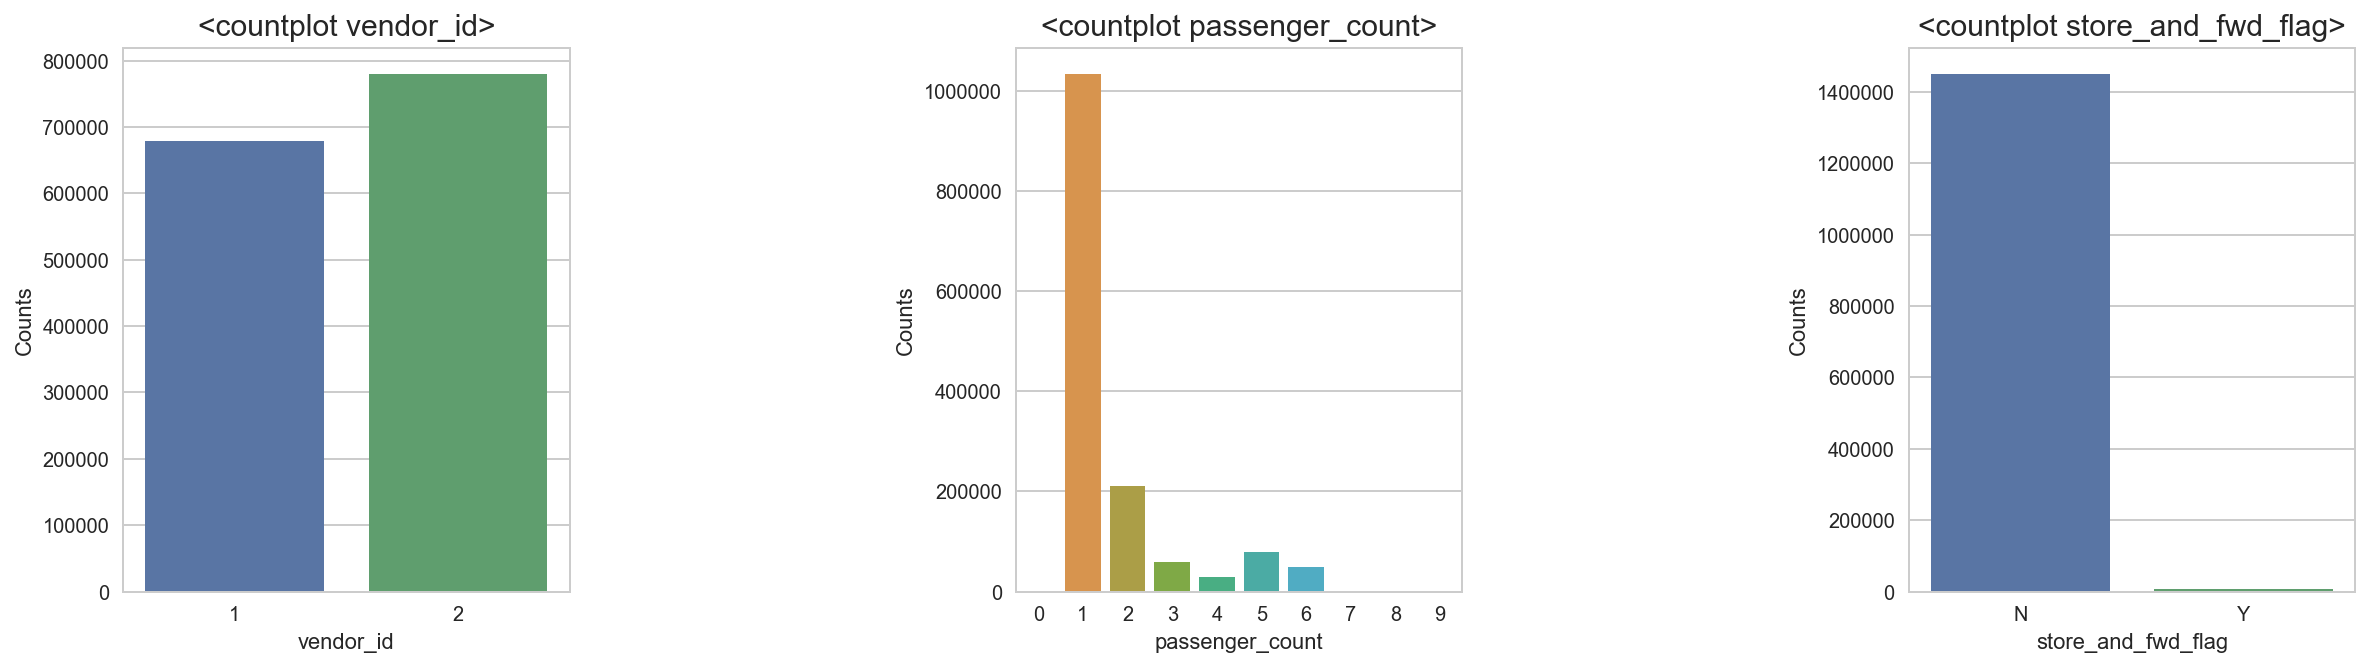

In [6]:
# countplot
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 1)

# vendor_id
plt.subplot(131)
sns.countplot(x = 'vendor_id', data = taxi)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('Counts')

# passenger_count
plt.subplot(132)
sns.countplot(x = 'passenger_count', data = taxi)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(x = 'store_and_fwd_flag', data = taxi)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Counts')

plt.show()

#### 1.2.2 Boxplot

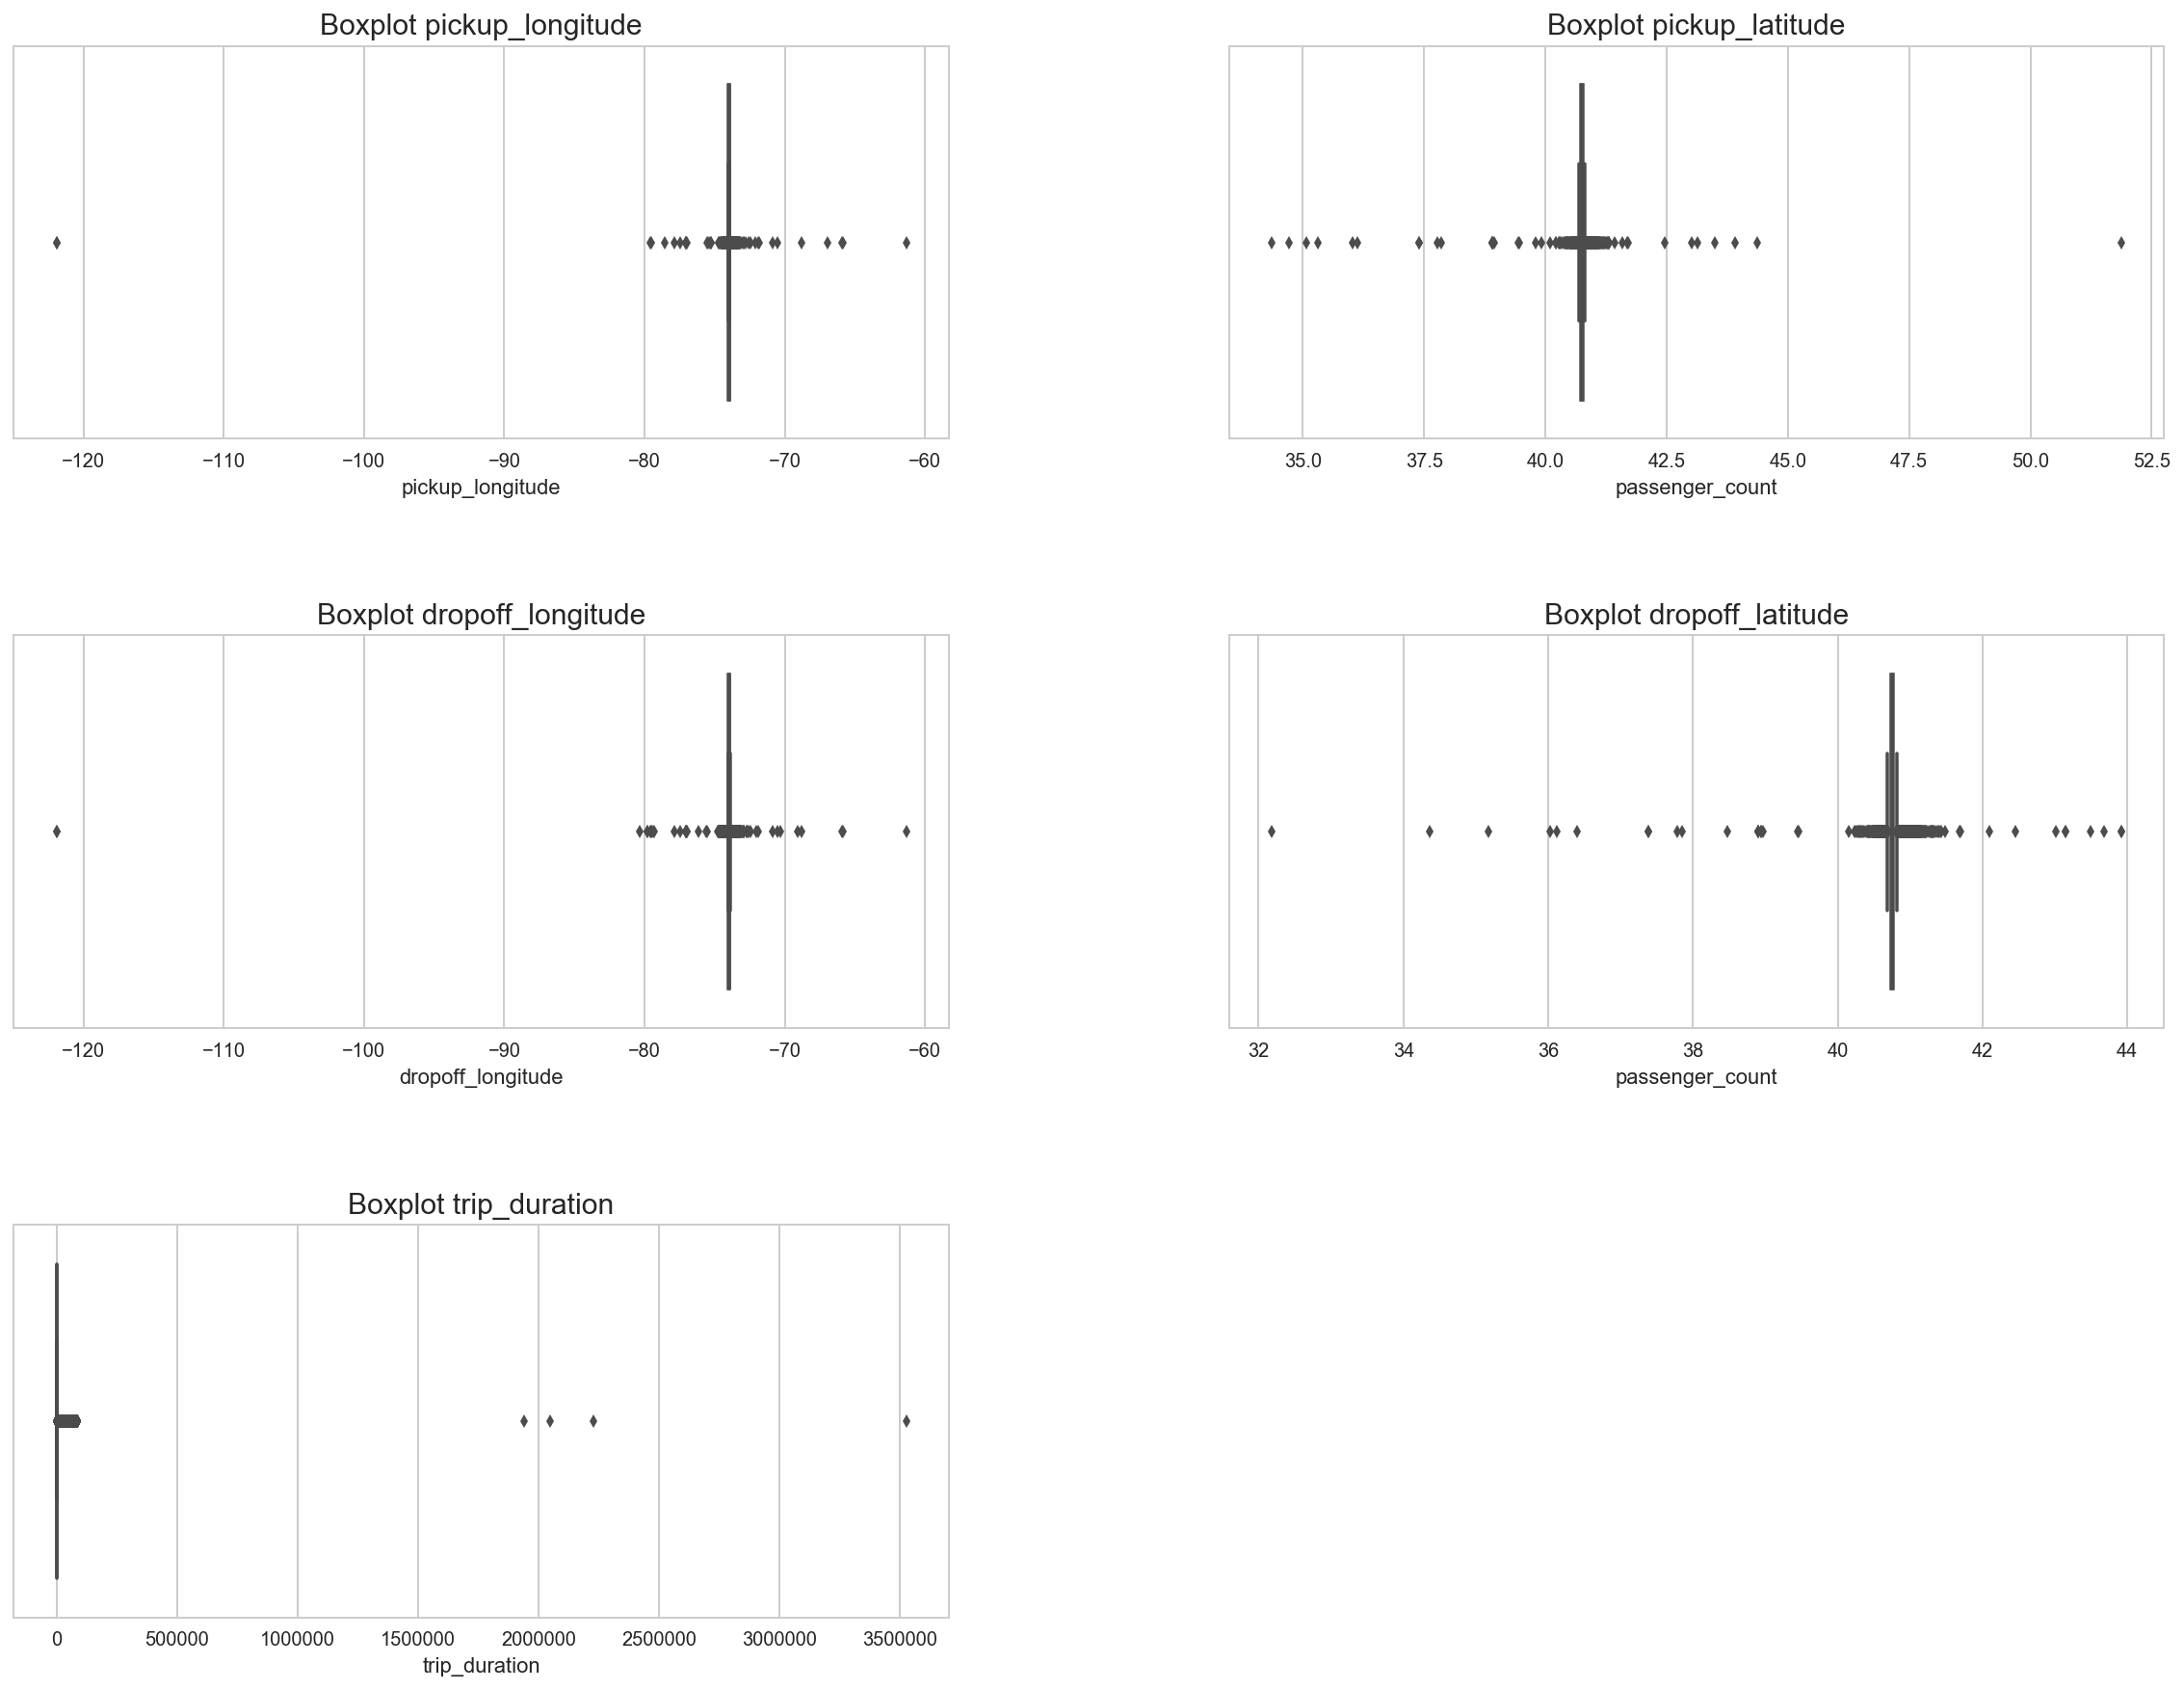

In [7]:
# boxplot
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
sns.boxplot(x = 'pickup_longitude', data = taxi)
plt.title('Boxplot pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
sns.boxplot(x = 'pickup_latitude', data = taxi)
plt.title('Boxplot pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
sns.boxplot(x = 'dropoff_longitude', data = taxi)
plt.title('Boxplot dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
sns.boxplot(x = 'dropoff_latitude', data = taxi)
plt.title('Boxplot dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('Boxplot trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

#### 1.2.3 Histogram

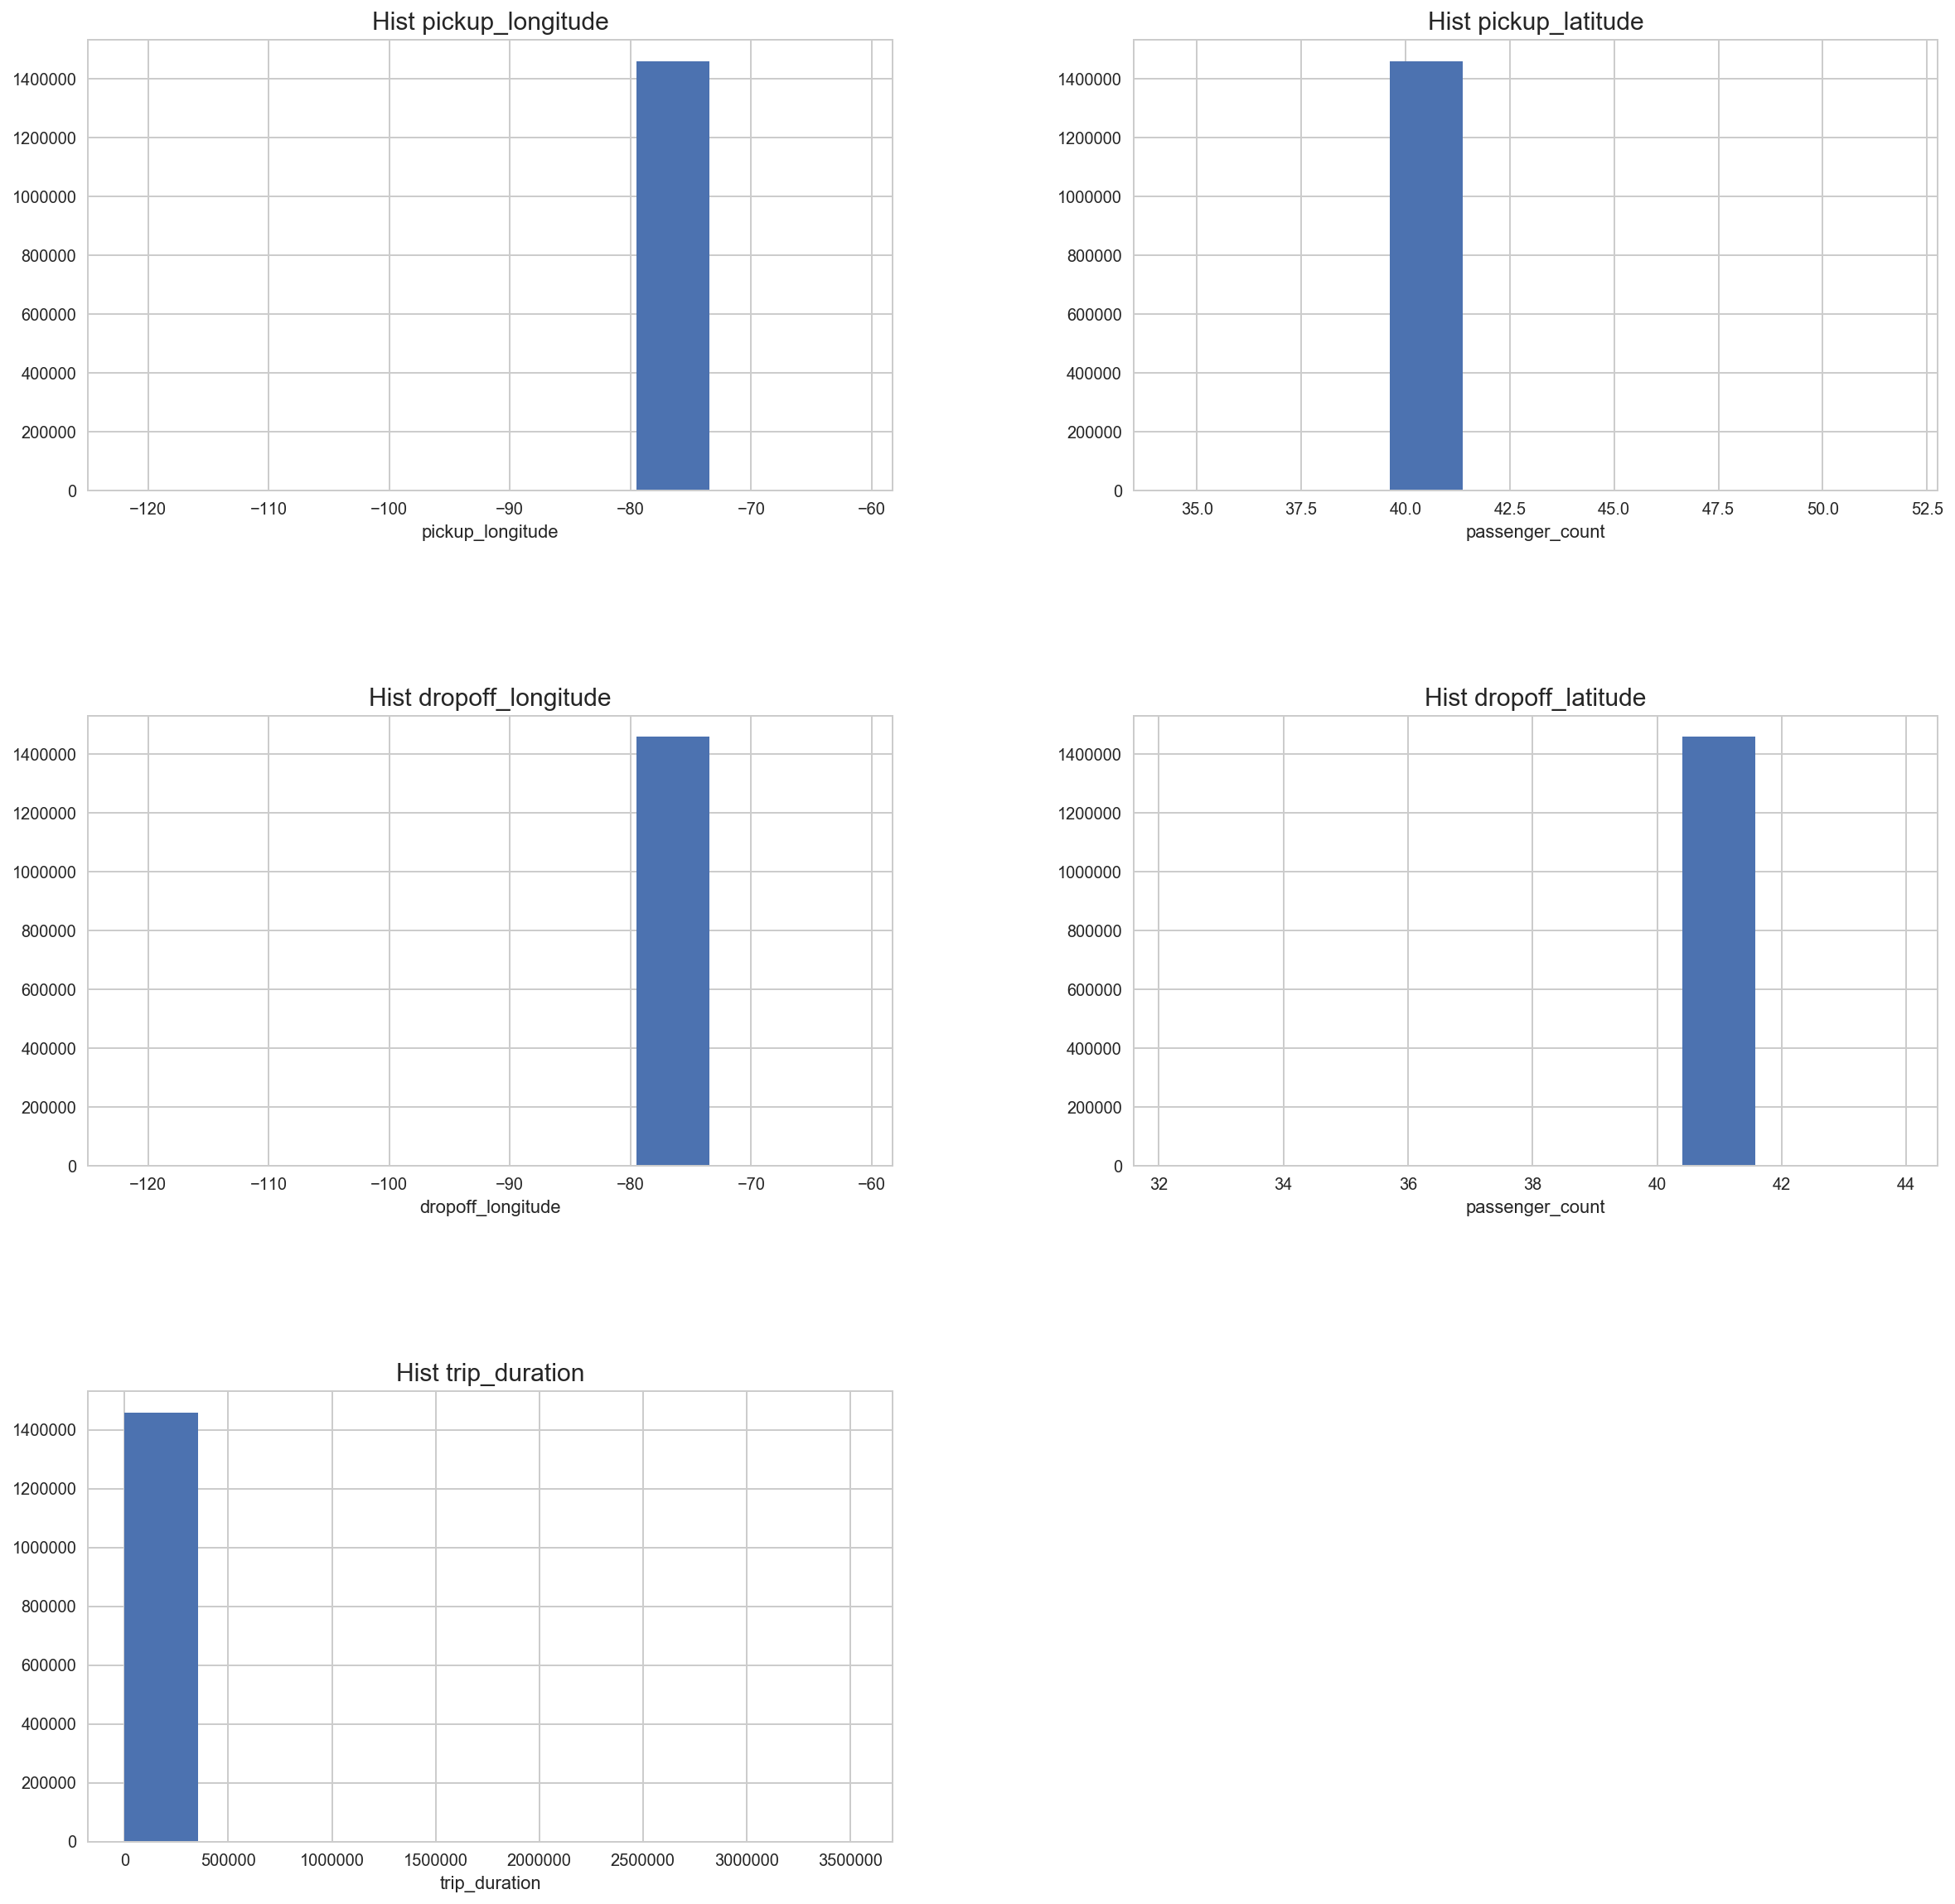

In [74]:
# histogram
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_longitude
plt.subplot(321)
plt.hist(x = 'pickup_longitude', data = taxi)
plt.title('Hist pickup_longitude', fontsize = 15)
plt.xlabel('pickup_longitude')

# pickup_latitude
plt.subplot(322)
plt.hist(x = 'pickup_latitude', data = taxi)
plt.title('Hist pickup_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# dropoff_longitude
plt.subplot(323)
plt.hist(x = 'dropoff_longitude', data = taxi)
plt.title('Hist dropoff_longitude', fontsize = 15)
plt.xlabel('dropoff_longitude')

# dropoff_latitude
plt.subplot(324)
plt.hist(x = 'dropoff_latitude', data = taxi)
plt.title('Hist dropoff_latitude', fontsize = 15)
plt.xlabel('passenger_count')

# Trip_druation
plt.subplot(325)
plt.hist(x = 'trip_duration', data = taxi)
plt.title('Hist trip_duration', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

### 1.3 독립변수(X)별 종속변수(trip_duration) EDA

In [22]:
# Trip_duration boxplot에서 나타난 4개의 이상치 제거
taxi_EDA = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)

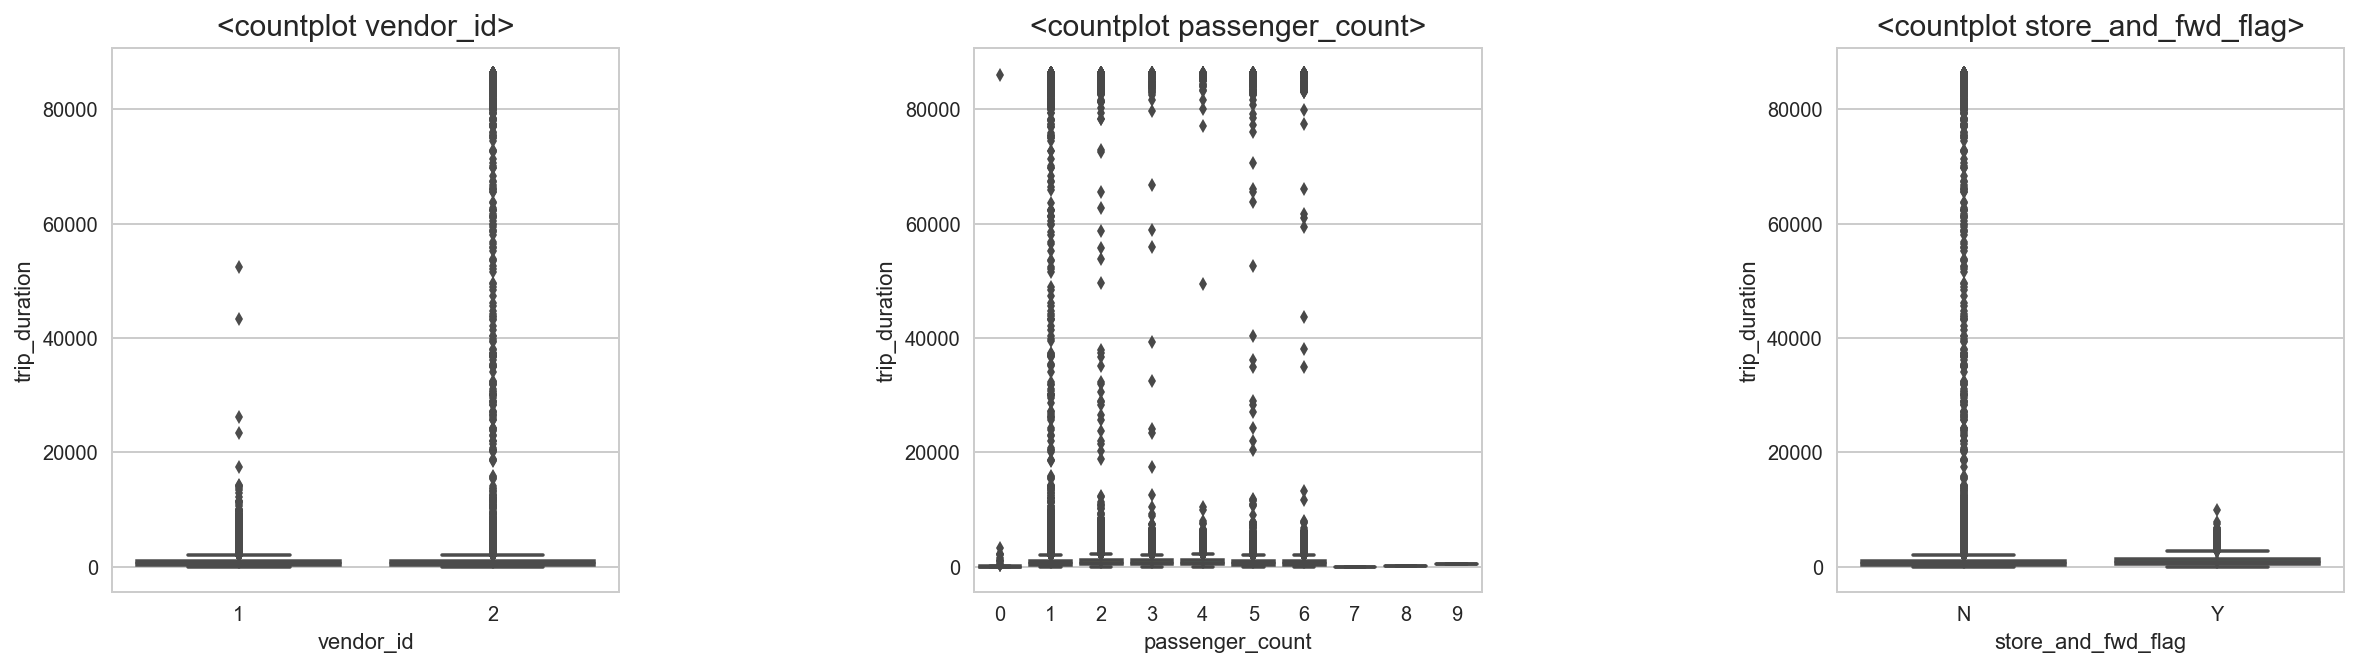

In [23]:
# countplot
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.boxplot(x = 'vendor_id', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot vendor_id>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('trip_duration')

# passenger_count
plt.subplot(132)
sns.boxplot(x = 'passenger_count', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot passenger_count>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')

# store_and_fwd_flag
plt.subplot(133)
sns.boxplot(x = 'store_and_fwd_flag', y = 'trip_duration', data = taxi_EDA)
plt.title('<countplot store_and_fwd_flag>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('trip_duration')

plt.show()

In [24]:
# pairplot (시간이 오래걸려서 일단 생략)
# sns.pairplot(taxi)
# plt.show()

---

## 2. 독립변수 수정 / 추가

### 2.1 독립변수 수정

In [25]:
# id 숫자화 - 분석을 위해 숫자화
taxi['id'] = taxi['id'].apply(lambda x: x[2:])

# store_and_fwd_flag -  N, Y 를 0, 1 숫자로 변경
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# pickup_datetime, dropoff_datetime 형식 바꿈
taxi['pickup_datetime'] = taxi['pickup_datetime'].apply(strptime)
taxi['dropoff_datetime'] = taxi['dropoff_datetime'].apply(strptime)

### 2.2 독립변수 추가

In [26]:
# 좌표를 이용해 거리 생성
taxi['dist'] = haversine_np(taxi['pickup_longitude'], taxi['pickup_latitude'], 
                            taxi['dropoff_longitude'], taxi['dropoff_latitude'])

# 시간 데이터를 2016.01.01 기준으로 숫사형으로 변경
taxi['pick_date'] = taxi['pickup_datetime'].apply(date_to_zero)
taxi['pick_time'] = taxi['pickup_datetime'].apply(time_to_zero)
taxi['drop_time'] = taxi['dropoff_datetime'].apply(time_to_zero)
taxi['weekday'] = taxi['pickup_datetime'].apply(week_num)

# holiday는 날짜별로 휴일인지 아닌 0, 1 카테고리값 부여
taxi['holiday'] = taxi['pickup_datetime'].apply(holiday)

In [27]:
# 분석을 위해 y(trip_duration)을 제일 끝으로 보냄
temp = taxi['trip_duration'] 
taxi = taxi.drop(['pickup_datetime','dropoff_datetime','trip_duration'], axis=1)
taxi['trip_duration'] = temp

In [28]:
# 변수 수정 / 추가된 데이터 저장 및 불러오기
taxi.to_csv('edited_taxi.csv', index = False)
taxi = pd.read_csv('edited_taxi.csv')

---

## 3. 수정 데이터 분석

- ANOVA
- 잔차 정규성

### 3.1 ANOVA

In [29]:
feature_n, features = get_features(taxi)
feature_n, features

(15,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + dist + pick_date + pick_time + drop_time + weekday + holiday + trip_duration')

In [30]:
# 분석을 위한 데이터 셋팅 (intercept추가)
taxi = dmatrix('{}'.format(features), taxi, return_type = 'dataframe')
taxi.tail()

,Intercept,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,dist,pick_date,pick_time,drop_time,weekday,holiday,trip_duration
1458639,1.00,2376096.00,2.00,4.00,-73.98,40.75,-73.99,40.74,0.00,1.22,98.00,48663.00,49441.00,5.00,1.00,778.00
1458640,1.00,1049543.00,1.00,1.00,-74.00,40.75,-73.97,40.80,0.00,6.05,9.00,27314.00,27969.00,7.00,1.00,655.00
1458641,1.00,2304944.00,2.00,1.00,-73.96,40.77,-74.00,40.71,0.00,7.82,112.00,25060.00,25824.00,5.00,1.00,764.00
1458642,1.00,2714485.00,1.00,1.00,-73.98,40.75,-73.97,40.76,0.00,1.09,4.00,57385.00,57758.00,2.00,1.00,373.00
1458643,1.00,1209952.00,1.00,1.00,-73.98,40.78,-73.97,40.79,0.00,1.13,95.00,53064.00,53262.00,2.00,1.00,198.00


In [31]:
# 독립변수 X 생성
feature_n, features = get_features(taxi, 1, -1) # Intercept, trip_duration 제거
feature_n, features

(14,
 'id + vendor_id + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + dist + pick_date + pick_time + drop_time + weekday + holiday')

In [32]:
# 분석결과
model = sm.OLS.from_formula('trip_duration ~ {}'.format(features), data = taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1015.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:31:52   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458629   BIC:                         2.911e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.023e+05   8493.067     12.046      0.000    8.57e+04    1.19e+05
id                 -8.155e-06   3.74e-06     -2.182      0.029   -1.55e-05    -8.3e-07
vendor_id            199.8535      9.062     22.055      0.000     182.093     217.614
passenger_count        8.0735      3.430      2.354      0.019       1.351      14.796
pickup_longitude     -25.9003    101.892     -0.254      0.799    -225.605     173.804
pickup_latitude    -1369.3814    154.253     -8.877      0.000   -1671.712   -1067.051
dropoff_longitude    316.4521    100.094      3.162      0.002     120.271     512.634
dropoff_latitude    -606.9214    139.448     -4.352      0.000    -880.235    -333.608
store_and_fwd_flag    49.0105     58.482      0.838      0.402     -65.613     163.634
dist                 112.0741      1.076    104.183      0.000     109.966     114.182
pick_date              0.4856      0.085      5.743      0.000       0.320       0.651
pick_time             -0.0046      0.001     -8.958      0.000      -0.006      -0.004
drop_time              0.0061      0.001     11.963      0.000       0.005       0.007
weekday               -3.7525      2.233     -1.681      0.093      -8.129       0.624
holiday             -107.8441     28.120     -3.835      0.000    -162.958     -52.730
================================================================================
Omnibus:                  8314604.750   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2324412381812004.500
Skew:                         347.728   Prob(JB):                           0.00
Kurtosis:                  195565.153   Cond. No.                       4.55e+09
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# 전체 ANOVA Table
sm.stats.anova_lm(result, typ = 2)

,sum_sq,df,F,PR(>F)
id,129342424.21,1.00,4.76,0.03
vendor_id,13214098861.27,1.00,486.42,0.00
passenger_count,150521008.91,1.00,5.54,0.02
pickup_longitude,1755338.81,1.00,0.06,0.80
pickup_latitude,2140971588.95,1.00,78.81,0.00
dropoff_longitude,271535779.78,1.00,10.00,0.00
dropoff_latitude,514598699.26,1.00,18.94,0.00
store_and_fwd_flag,19079196.05,1.00,0.70,0.40
dist,294867860652.89,1.00,10854.19,0.00
pick_date,895852130.87,1.00,32.98,0.00


In [34]:
# Category 값 ANOVA
model_c =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) +C(passenger_count) + C(holiday) + C(weekday) + 0", data = taxi)
result_c = model_c.fit()
result_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     43.23
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          3.74e-145
Time:                        21:32:21   Log-Likelihood:            -1.4561e+07
No. Observations:             1458644   AIC:                         2.912e+07
Df Residuals:                 1458626   BIC:                         2.912e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
C(vendor_id)[1.0]          1581.7146    676.096      2.339      0.019     256.589    2906.840
C(vendor_id)[2.0]          1788.5555    676.098      2.645      0.008     463.427    3113.684
C(passenger_count)[T.1.0]  -799.3184    676.006     -1.182      0.237   -2124.267     525.630
C(passenger_count)[T.2.0]  -740.6660    676.082     -1.096      0.273   -2065.763     584.431
C(passenger_count)[T.3.0]  -728.5002    676.325     -1.077      0.281   -2054.073     597.073
C(passenger_count)[T.4.0]  -694.5249    676.699     -1.026      0.305   -2020.831     631.782
C(passenger_count)[T.5.0]  -768.0427    676.262     -1.136      0.256   -2093.492     557.407
C(passenger_count)[T.6.0]  -777.3466    676.422     -1.149      0.250   -2103.110     548.416
C(passenger_count)[T.7.0] -1802.8596   3097.752     -0.582      0.561   -7874.347    4268.628
C(passenger_count)[T.8.0] -1679.6119   5279.674     -0.318      0.750    -1.2e+04    8668.368
C(passenger_count)[T.9.0] -1317.1396   5279.610     -0.249      0.803   -1.17e+04    9030.715
C(holiday)[T.2.0]           -93.5278     28.817     -3.246      0.001    -150.009     -37.046
C(weekday)[T.2.0]            75.5326     17.061      4.427      0.000      42.094     108.971
C(weekday)[T.3.0]            68.2510     16.921      4.034      0.000      35.087     101.415
C(weekday)[T.4.0]            99.1806     16.771      5.914      0.000      66.310     132.051
C(weekday)[T.5.0]            88.5842     16.430      5.392      0.000      56.382     120.786
C(weekday)[T.6.0]            36.5045     16.742      2.180      0.029       3.691      69.318
C(weekday)[T.7.0]           -10.1247     17.217     -0.588      0.556     -43.869      23.620
================================================================================
Omnibus:                  8287328.920   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2248819711886752.250
Skew:                         343.445   Prob(JB):                           0.00
Kurtosis:                  192358.902   Cond. No.                       1.37e+03
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# F-Test 검정 결과 id, store_and_fwd_flag 변수를 제거하는게 좋을 것이라 판단
taxi_1 = taxi.drop(['id', "pickup_longitude", "store_and_fwd_flag", "weekday"], axis = 1)

In [36]:
feature_n_1, features_1 = get_features(taxi_1, 1, -1)
feature_n_1, features_1

(10,
 'vendor_id + passenger_count + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + holiday')

In [37]:
model_1 = sm.OLS.from_formula('trip_duration ~ {}'.format(features_1), data = taxi_1)
result_1 = model_1.fit()
result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1420.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:32:23   Log-Likelihood:            -1.4554e+07
No. Observations:             1458644   AIC:                         2.911e+07
Df Residuals:                 1458633   BIC:                         2.911e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.025e+05   8325.144     12.309      0.000    8.62e+04    1.19e+05
vendor_id           199.3207      9.034     22.063      0.000     181.614     217.028
passenger_count       7.9110      3.429      2.307      0.021       1.191      14.631
pickup_latitude   -1360.7924    153.626     -8.858      0.000   -1661.893   -1059.692
dropoff_longitude   297.0311     62.588      4.746      0.000     174.361     419.701
dropoff_latitude   -608.7139    138.983     -4.380      0.000    -881.115    -336.313
dist                112.0289      1.044    107.295      0.000     109.982     114.075
pick_date             0.4896      0.085      5.792      0.000       0.324       0.655
pick_time            -0.0046      0.001     -8.951      0.000      -0.006      -0.004
drop_time             0.0061      0.001     12.013      0.000       0.005       0.007
holiday            -102.7305     27.956     -3.675      0.000    -157.524     -47.937
================================================================================
Omnibus:                  8314599.848   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2324397076361402.500
Skew:                         347.727   Prob(JB):                           0.00
Kurtosis:                  195564.509   Cond. No.                       1.52e+08
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.2 잔차 정규성

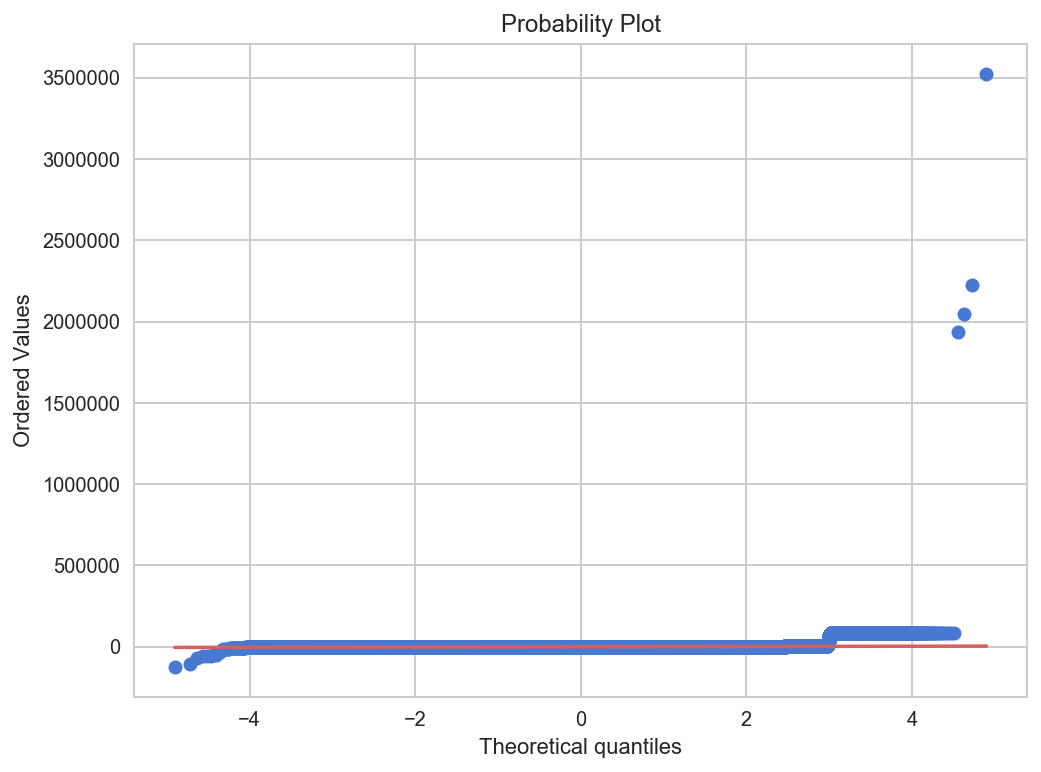

In [77]:
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result_1.resid, plot = plt)
plt.show()

In [39]:
# Resid test1 
test_resid1 = sms.omni_normtest(result_1.resid)
for xi in zip(['Chi^2', 'P-value'], test_resid1):
    print("%-12s: %6.3f" % xi)

Chi^2       : 8314599.848
P-value     :  0.000


In [40]:
# Resid test2     
test_resid2 = sms.jarque_bera(result_1.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test_resid2):
    print("%-12s: %6.3f" % xi)

Jarque-Bera : 2324397076361402.500
P-value     :  0.000
Skew        : 347.727
Kurtosis    : 195564.509


In [41]:
# x값에 따른 잔차의 분포 (시간이 걸려서 일단 패스)
# plt.plot(test_1, result_F.resid, 'o')
# plt.axhline(y=0, c='k')
# plt.xlabel("X1")
# plt.ylabel("Residual")
# plt.show()

---

## 04. 레버리지 (Leverage)

In [42]:
# (시간이 걸려서 일단 패스)
# influence = result_1.get_influence()
# hat = influence.hat_matrix_diag

# plt.figure(figsize = (10, 2))
# plt.stem(hat)
# plt.show()

---

## 05. 아웃라이어 (Outlier)

In [43]:
taxi_2, drop = erase_outlier_np(result_1, taxi_1, feature_n_1, dropped=True)
len(taxi_2), len(drop)

(1456346, 2298)

In [44]:
feature_n_2, features_2 = get_features(taxi_2, 1, -1)
feature_n_2, features_2

(10,
 'vendor_id + passenger_count + pickup_latitude + dropoff_longitude + dropoff_latitude + dist + pick_date + pick_time + drop_time + holiday')

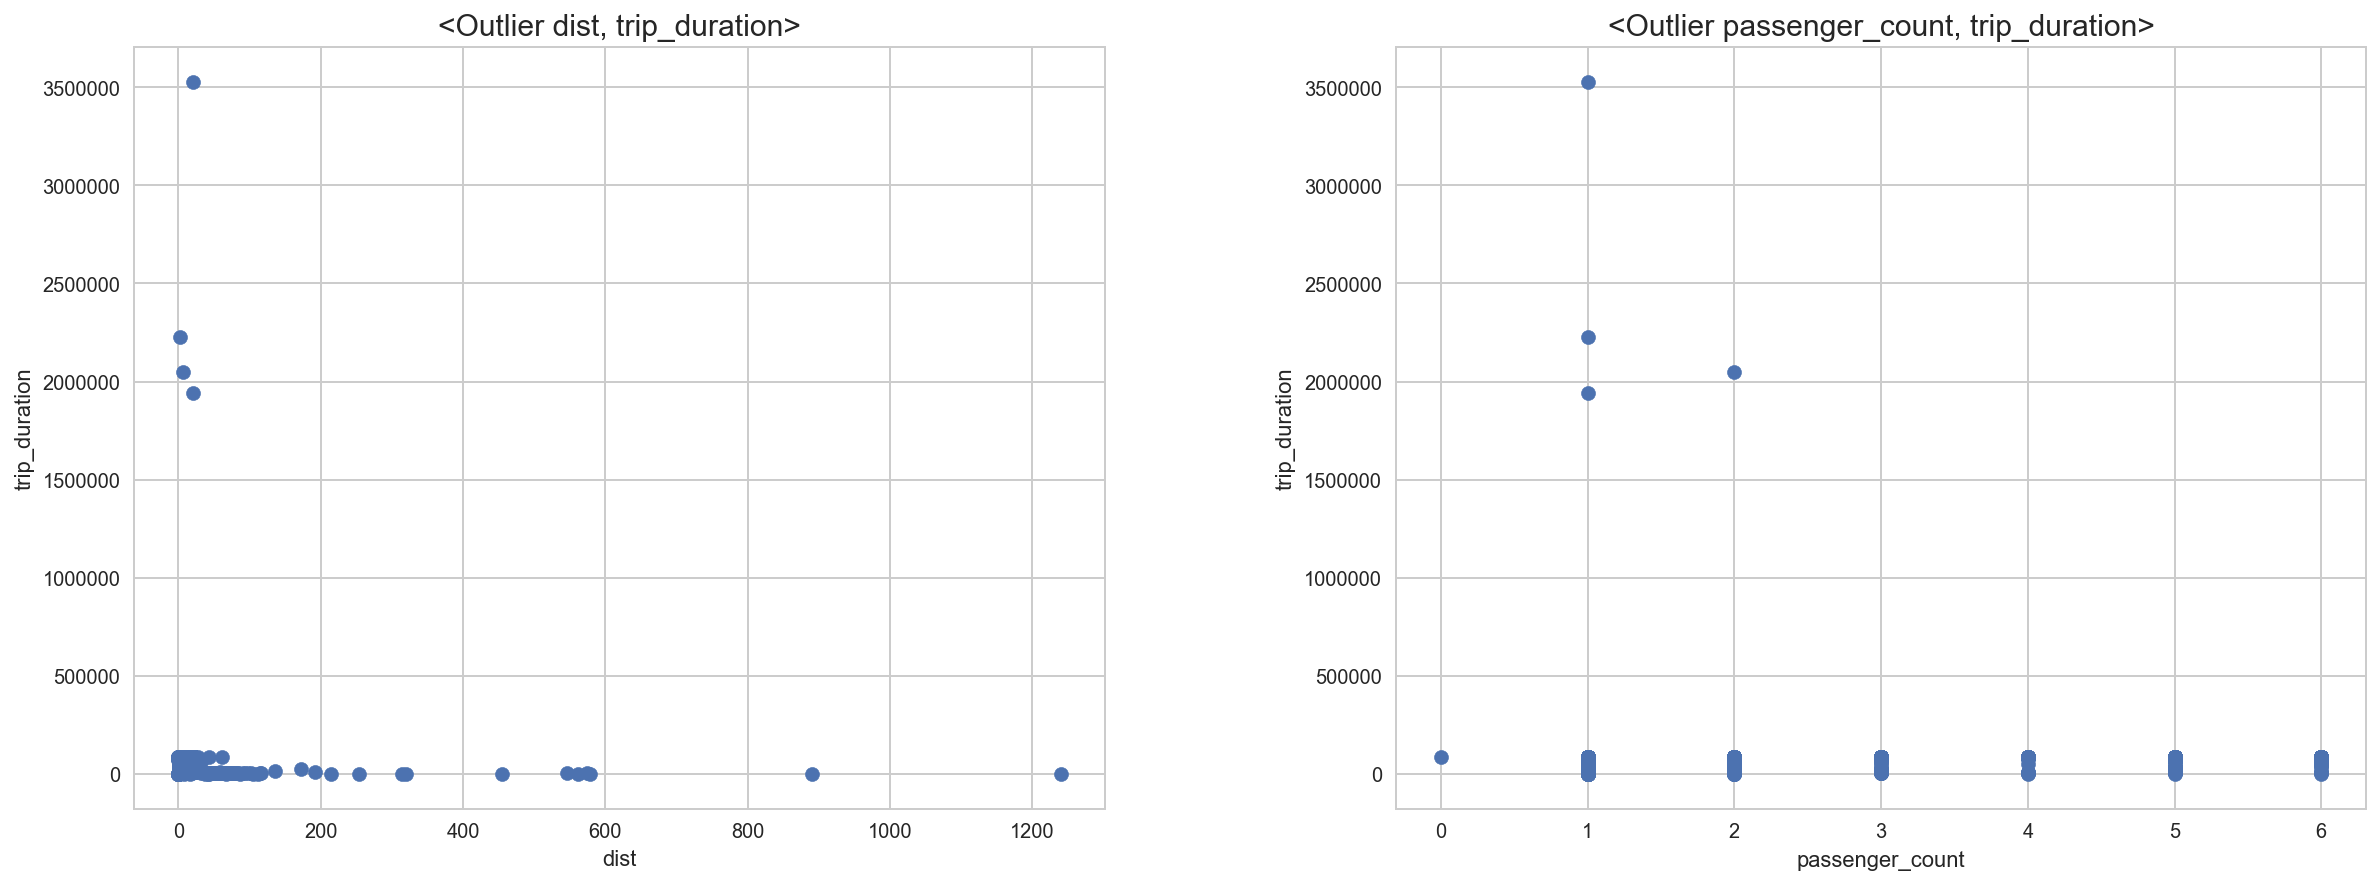

In [45]:
# Outlier
plt.figure(figsize = (20, 7))
plt.subplots_adjust(wspace = 0.3)

# outlier 제거 확인 (dist, trip_duration)
plt.subplot(121)
plt.scatter(drop['dist'], drop['trip_duration'])
plt.title('<Outlier dist, trip_duration>', fontsize = 15)
plt.xlabel('dist')
plt.ylabel('trip_duration')

# outlier 제거 확인 (passenger_count, trip_duration)
plt.subplot(122)
plt.scatter(drop['passenger_count'], drop['trip_duration'])
plt.title('<Outlier passenger_count, trip_duration>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('trip_duration')


plt.show()

In [46]:
model_2 =  sm.OLS.from_formula("trip_duration ~ {}".format(features_2), data = taxi_2)
result_2 = model_2.fit()
result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                 2.232e+05
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:32:32   Log-Likelihood:            -1.0839e+07
No. Observations:             1456346   AIC:                         2.168e+07
Df Residuals:                 1456335   BIC:                         2.168e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6.196e+04   1073.708    -57.709      0.000   -6.41e+04   -5.99e+04
vendor_id             0.0108      0.716      0.015      0.988      -1.393       1.415
passenger_count       2.9904      0.272     10.994      0.000       2.457       3.524
pickup_latitude    1088.7911     14.122     77.099      0.000    1061.112    1116.470
dropoff_longitude -1003.1125     10.430    -96.179      0.000   -1023.554    -982.671
dropoff_latitude  -1380.7028     11.862   -116.400      0.000   -1403.951   -1357.454
dist                133.2421      0.101   1324.669      0.000     133.045     133.439
pick_date             0.5633      0.007     84.032      0.000       0.550       0.576
pick_time            -0.0016   4.11e-05    -38.640      0.000      -0.002      -0.002
drop_time             0.0029   4.06e-05     72.318      0.000       0.003       0.003
holiday             -87.1519      2.217    -39.313      0.000     -91.497     -82.807
==============================================================================
Omnibus:                   780618.065   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20955154.082
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      21.124   Cond. No.                     2.47e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

## 06. 스케일링

In [47]:
taxi_2.tail()

,Intercept,vendor_id,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,holiday,trip_duration
1456341,1.00,2.00,4.00,40.75,-73.99,40.74,1.22,98.00,48663.00,49441.00,1.00,778.00
1456342,1.00,1.00,1.00,40.75,-73.97,40.80,6.05,9.00,27314.00,27969.00,1.00,655.00
1456343,1.00,2.00,1.00,40.77,-74.00,40.71,7.82,112.00,25060.00,25824.00,1.00,764.00
1456344,1.00,1.00,1.00,40.75,-73.97,40.76,1.09,4.00,57385.00,57758.00,1.00,373.00
1456345,1.00,1.00,1.00,40.78,-73.97,40.79,1.13,95.00,53064.00,53262.00,1.00,198.00


In [48]:
# category 변수 제외하고 scale 진행
feature_n_3, features_3 = get_features(taxi_2, 3, 9, scale = True)
feature_n_3, features_3

(6,
 'scale(pickup_latitude) + scale(dropoff_longitude) + scale(dropoff_latitude) + scale(dist) + scale(pick_date) + scale(pick_time)')

In [49]:
# 스케일 진행한 데이터 생성
taxi_3 = taxi_2.rename(index=str, columns={'scale(passenger_count)':'passenger_count', 
                     'scale(pickup_longitude)':'pickup_longitude',
                     'scale(pickup_latitude)':'pickup_latitude', 
                     'scale(dropoff_longitude)':'dropoff_longitude',
                     'scale(dropoff_latitude)':'dropoff_latitude', 
                     'scale(dist)':'dist',
                     'scale(pick_date)' : 'pick_date',
                     'scale(pick_time)'  : 'pick_time', 
                     'scale(drop_time)' : 'drop_time',})

In [50]:
model_3 =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) + C(passenger_count) + C(holiday) + {} ".format(features_3), data = taxi_3)
result_3 = model_3.fit()
result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                 1.306e+05
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:11   Log-Likelihood:            -1.0841e+07
No. Observations:             1456346   AIC:                         2.168e+07
Df Residuals:                 1456328   BIC:                         2.168e+07
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   603.5143     53.856     11.206      0.000     497.958     709.070
C(vendor_id)[T.2.0]           0.9530      0.720      1.324      0.186      -0.458       2.364
C(passenger_count)[T.1.0]   230.4449     53.856      4.279      0.000     124.888     336.002
C(passenger_count)[T.2.0]   246.4648     53.863      4.576      0.000     140.896     352.034
C(passenger_count)[T.3.0]   251.0556     53.882      4.659      0.000     145.449     356.662
C(passenger_count)[T.4.0]   258.8900     53.911      4.802      0.000     153.226     364.554
C(passenger_count)[T.5.0]   232.7713     53.877      4.320      0.000     127.175     338.368
C(passenger_count)[T.6.0]   240.0033     53.889      4.454      0.000     134.382     345.624
C(passenger_count)[T.7.0]  -144.8570    244.822     -0.592      0.554    -624.699     334.985
C(passenger_count)[T.8.0]  -761.5619    417.154     -1.826      0.068   -1579.170      56.046
C(passenger_count)[T.9.0]   633.2349    417.159      1.518      0.129    -184.382    1450.852
C(holiday)[T.2.0]           -87.6210      2.221    -39.456      0.000     -91.973     -83.268
scale(pickup_latitude)       31.2159      0.399     78.295      0.000      30.434      31.997
scale(dropoff_longitude)    -36.5250      0.378    -96.735      0.000     -37.265     -35.785
scale(dropoff_latitude)     -44.5265      0.384   -115.812      0.000     -45.280     -43.773
scale(dist)                 521.2572      0.394   1321.587      0.000     520.484     522.030
scale(pick_date)             28.8893      0.346     83.440      0.000      28.211      29.568
scale(pick_time)             27.1101      0.343     78.952      0.000      26.437      27.783
==============================================================================
Omnibus:                   783807.326   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21254386.841
Skew:                           2.061   Prob(JB):                         0.00
Kurtosis:                      21.256   Cond. No.                     1.69e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

## 07. 변수변환

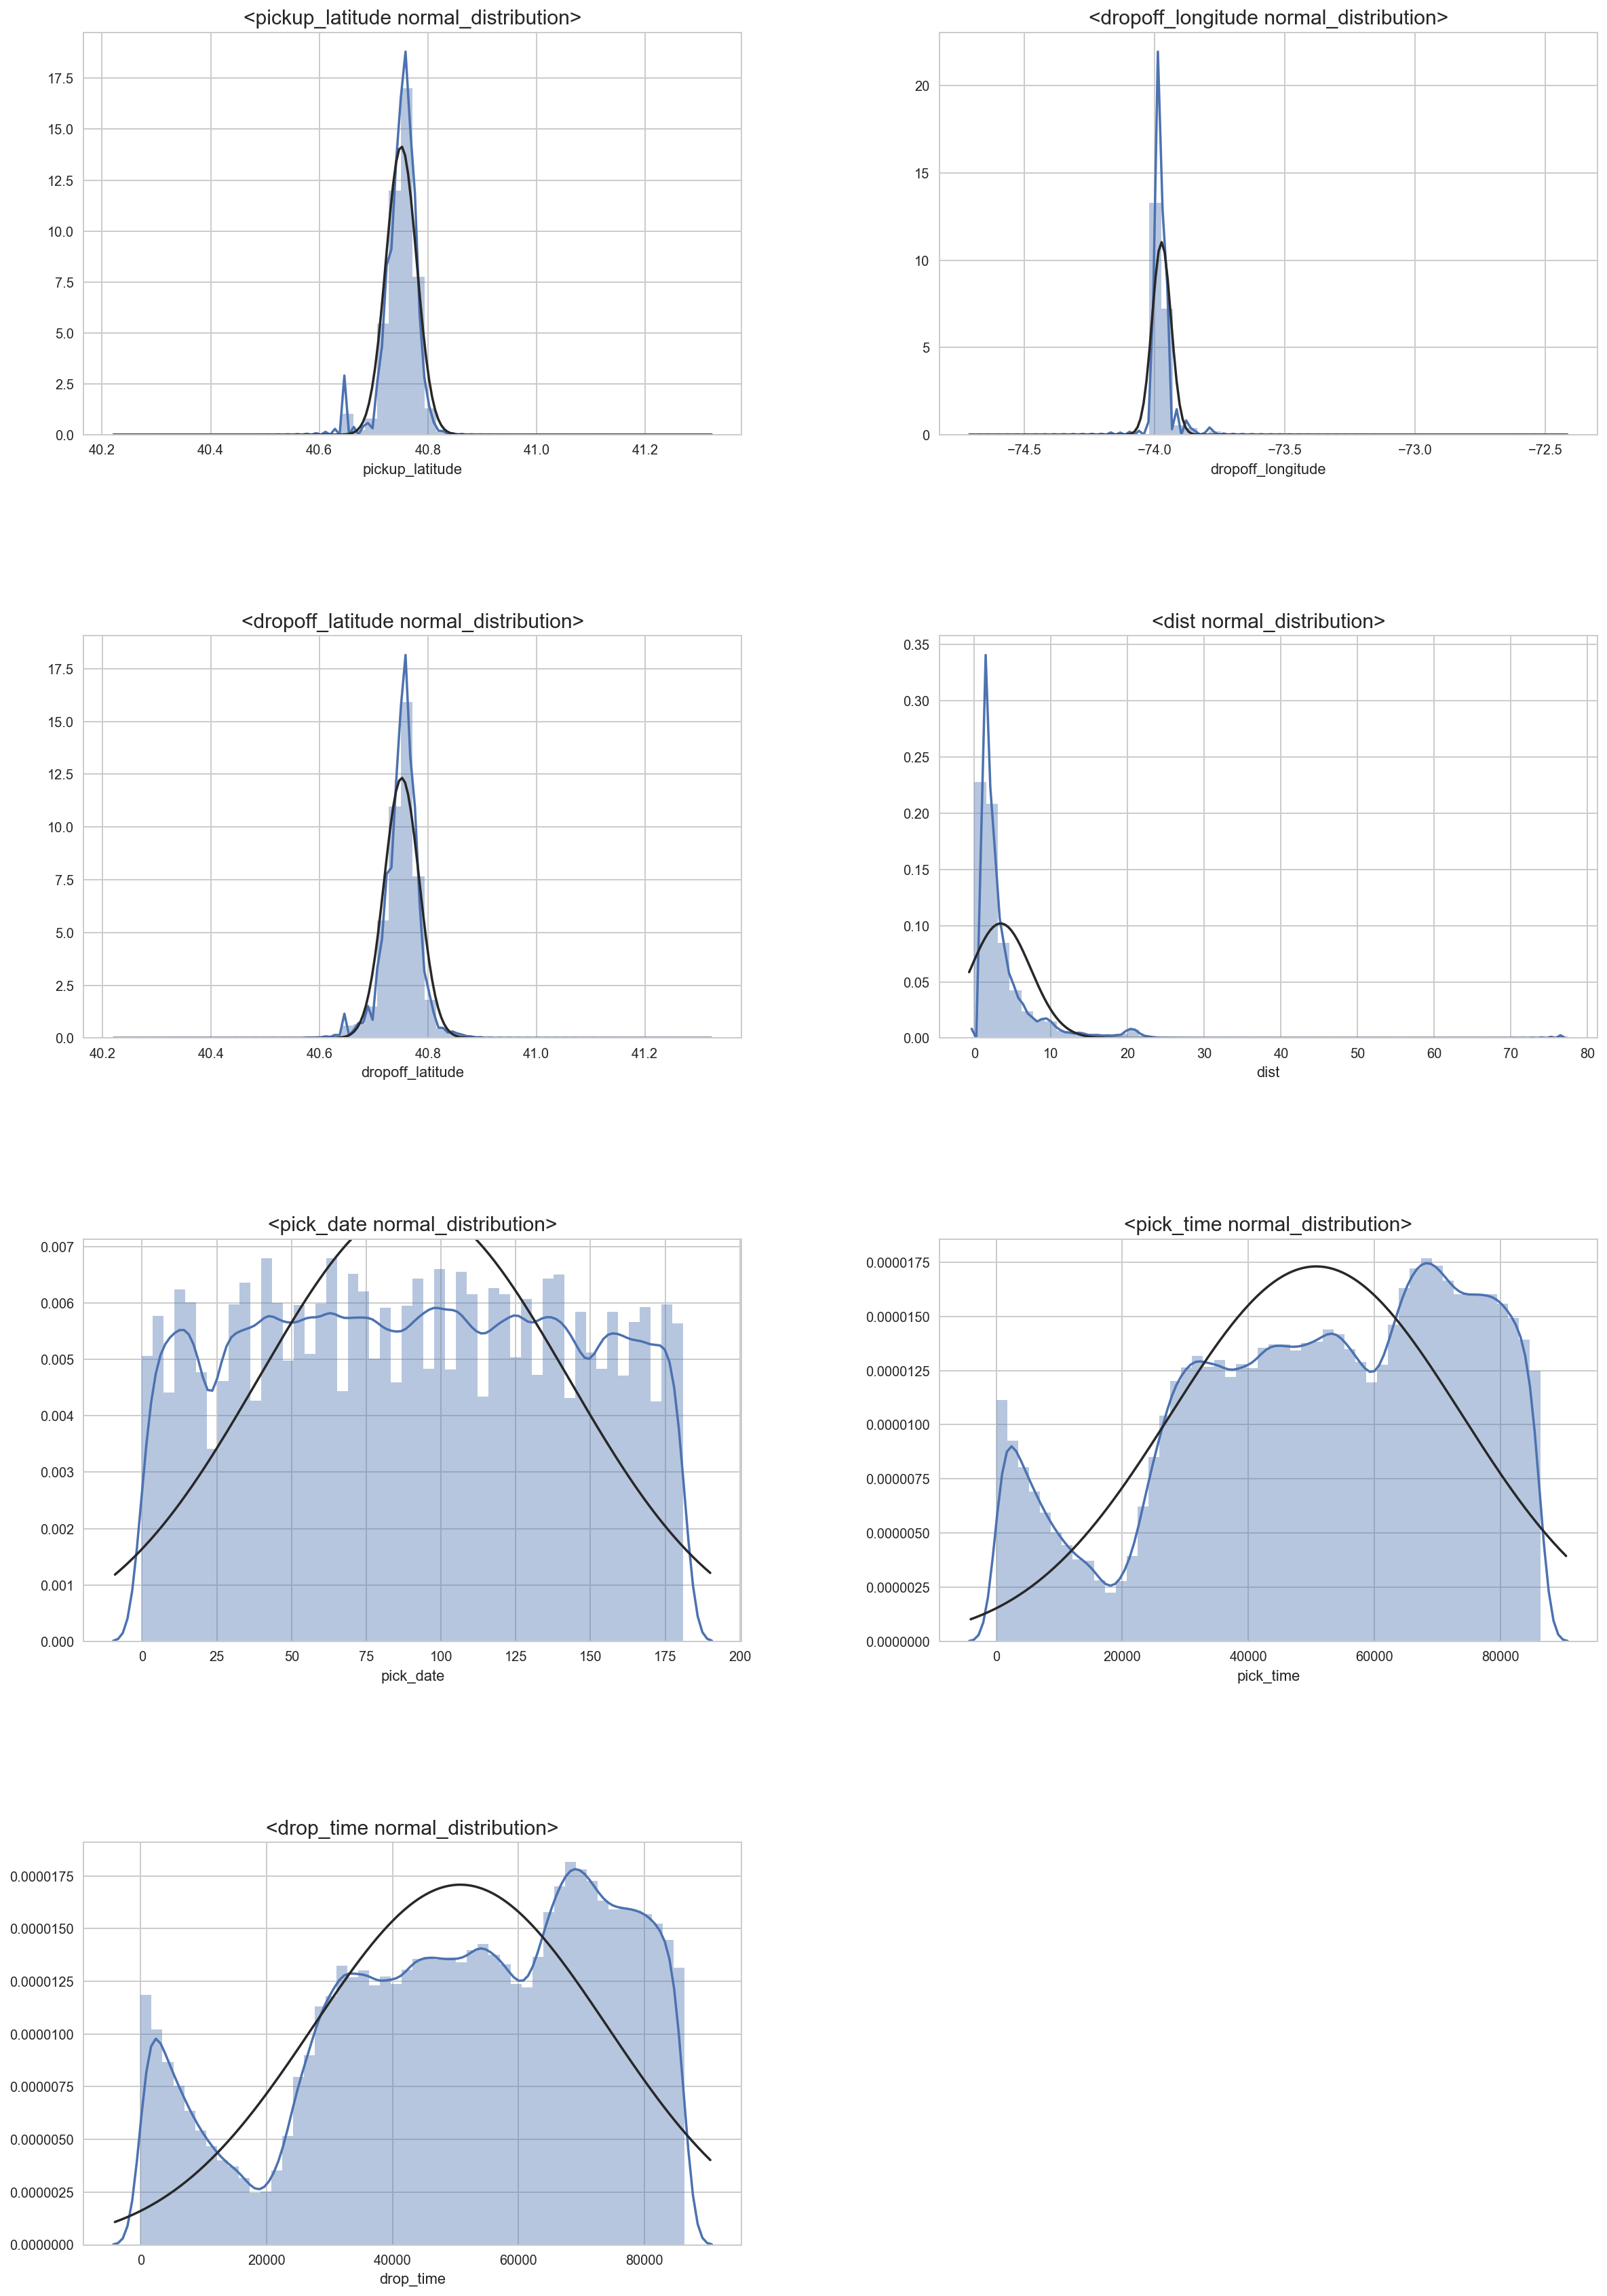

In [51]:
# 정규분포
plt.figure(figsize = (20, 30))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# pickup_latitude 정규분포
plt.subplot(421)
sns.distplot(taxi_3['pickup_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<pickup_latitude normal_distribution>', fontsize = 15)

# dropoff_longitude 정규분포
plt.subplot(422)
sns.distplot(taxi_3['dropoff_longitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_longitude normal_distribution>', fontsize = 15)

# dropoff_latitude 정규분포
plt.subplot(423)
sns.distplot(taxi_3['dropoff_latitude'], kde = True, fit=sp.stats.norm)
plt.title('<dropoff_latitude normal_distribution>', fontsize = 15)

# dist 정규분포
plt.subplot(424)
sns.distplot(taxi_3['dist'], kde = True, fit=sp.stats.norm)
plt.title('<dist normal_distribution>', fontsize = 15)

# pick_date 정규분포
plt.subplot(425)
sns.distplot(taxi_3['pick_date'], kde = True, fit = sp.stats.norm)
plt.title('<pick_date normal_distribution>', fontsize = 15)

# pick_time 정규분포
plt.subplot(426)
sns.distplot(taxi_3['pick_time'], kde=True, fit = sp.stats.norm)
plt.title('<pick_time normal_distribution>', fontsize = 15)

# drop_time 정규분포
plt.subplot(427)
sns.distplot(taxi_3['drop_time'], kde = True, fit = sp.stats.norm)
plt.title('<drop_time normal_distribution>', fontsize = 15)

plt.show()

---

## 08. 다중공선성

### 8.1 상관분석

In [52]:
# 상관분석
taxi_4 = taxi_3.drop(['Intercept', 'trip_duration'], axis = 1)
taxi_4.corr()

,vendor_id,passenger_count,pickup_latitude,dropoff_longitude,dropoff_latitude,dist,pick_date,pick_time,drop_time,holiday
vendor_id,1.00,0.29,0.00,0.00,0.00,0.01,-0.01,0.01,0.01,0.00
passenger_count,0.29,1.00,-0.01,-0.00,-0.00,0.01,-0.00,0.01,0.01,0.00
pickup_latitude,0.00,-0.01,1.00,0.05,0.43,-0.31,-0.00,0.01,0.02,-0.00
dropoff_longitude,0.00,-0.00,0.05,1.00,0.13,0.36,0.01,-0.04,-0.04,0.00
dropoff_latitude,0.00,-0.00,0.43,0.13,1.00,-0.16,-0.00,0.02,0.02,-0.00
dist,0.01,0.01,-0.31,0.36,-0.16,1.00,0.02,-0.02,-0.02,0.01
pick_date,-0.01,-0.00,-0.00,0.01,-0.00,0.02,1.00,-0.00,-0.00,-0.14
pick_time,0.01,0.01,0.01,-0.04,0.02,-0.02,-0.00,1.00,0.93,-0.01
drop_time,0.01,0.01,0.02,-0.04,0.02,-0.02,-0.00,0.93,1.00,-0.01
holiday,0.00,0.00,-0.00,0.00,-0.00,0.01,-0.14,-0.01,-0.01,1.00


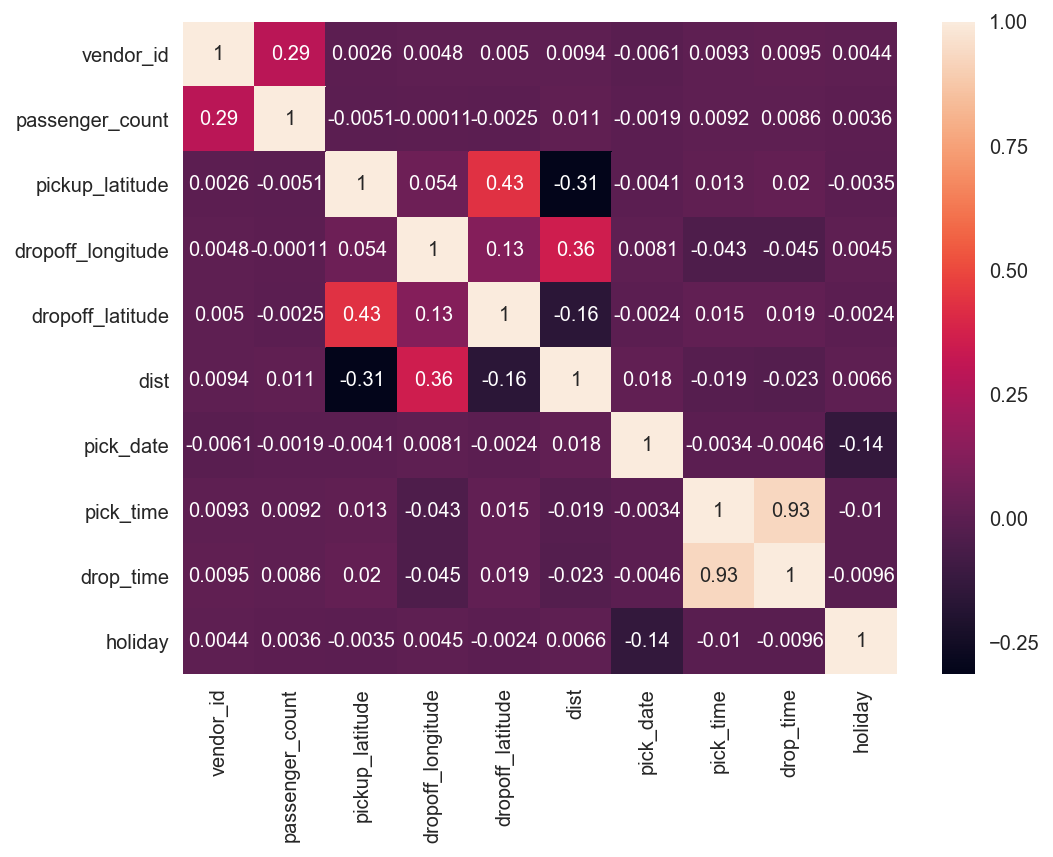

In [76]:
# heatmap
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(taxi_4.corr(), annot=True)
plt.show()

### 8.2 VIF (Variance Inflation Factor)

In [54]:
# VIF로 다중공선성 제거
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_4.values, i) for i in range(taxi_4.shape[1])]
vif["features"] = taxi_4.columns
vif

,VIF Factor,features
0,11.41,vendor_id
1,2.84,passenger_count
2,2262593.90,pickup_latitude
3,1461591.22,dropoff_longitude
4,1762868.53,dropoff_latitude
5,1.79,dist
6,4.19,pick_date
7,44.90,pick_time
8,43.93,drop_time
9,45.10,holiday


In [55]:
# 다중공선성이 높은 요인 제거
taxi_5 = taxi_3.drop(["pickup_latitude", "dropoff_longitude", "dropoff_latitude"], axis = 1)
taxi_5.head()

,Intercept,vendor_id,passenger_count,dist,pick_date,pick_time,drop_time,holiday,trip_duration
0,1.00,2.00,1.00,1.50,73.00,62694.00,63149.00,1.00,455.00
1,1.00,1.00,1.00,1.80,163.00,2614.00,3277.00,1.00,663.00
2,1.00,2.00,1.00,6.38,18.00,41723.00,43847.00,1.00,2124.00
3,1.00,2.00,1.00,1.48,96.00,70350.00,70779.00,1.00,429.00
4,1.00,2.00,1.00,1.19,85.00,48654.00,49089.00,1.00,435.00


In [56]:
feature_n_5, features_5 = get_features(taxi_5, 3, 6)
feature_n_5, features_5

(3, 'dist + pick_date + pick_time')

In [57]:
model_5 =  sm.OLS.from_formula("trip_duration ~ C(vendor_id) + C(holiday) + {} ".format(features_5), data = taxi_5)
result_5 = model_5.fit()
result_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                 4.306e+05
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:44   Log-Likelihood:            -1.0854e+07
No. Observations:             1456346   AIC:                         2.171e+07
Df Residuals:                 1456340   BIC:                         2.171e+07
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             281.1207      1.150    244.458      0.000     278.867     283.375
C(vendor_id)[T.2.0]     2.0380      0.694      2.938      0.003       0.679       3.397
C(holiday)[T.2.0]     -87.5332      2.241    -39.058      0.000     -91.926     -83.141
dist                  129.2179      0.088   1461.315      0.000     129.045     129.391
pick_date               0.5607      0.007     82.754      0.000       0.547       0.574
pick_time               0.0012    1.5e-05     81.839      0.000       0.001       0.001
==============================================================================
Omnibus:                   765444.346   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19714248.753
Skew:                           2.008   Prob(JB):                         0.00
Kurtosis:                      20.571   Cond. No.                     3.62e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---

## 09. 다항회귀

In [58]:
# dist
model_6 =  sm.OLS.from_formula('trip_duration ~ dist', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ dist + I(dist**2)', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 세제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ dist + I(dist**2) + I(dist**3)', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

# 네제곱 추가
model_6 =  sm.OLS.from_formula('trip_duration ~ dist + I(dist**2) + I(dist**3) + I(dist**4)', data = taxi_5)
result_6 = model_6.fit()
print(result_6.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                 2.113e+06
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:44   Log-Likelihood:            -1.0862e+07
No. Observations:             1456346   AIC:                         2.172e+07
Df Residuals:                 1456344   BIC:                         2.172e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    393.4089      0.462    850.654      0.0

In [59]:
# pick_date
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date + I(pick_date**2)', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 세제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date + I(pick_date**2) + I(pick_date**3)', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

# 네제곱 추가
model_7 =  sm.OLS.from_formula('trip_duration ~ pick_date + I(pick_date**2) + I(pick_date**3) + I(pick_date**4)', data = taxi_5)
result_7 = model_7.fit()
print(result_7.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     5406.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:47   Log-Likelihood:            -1.1513e+07
No. Observations:             1456346   AIC:                         2.303e+07
Df Residuals:                 1456344   BIC:                         2.303e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    766.0174      1.101    695.687      0.0

In [60]:
# pick_time
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time + I(pick_time**2)', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 세제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time + I(pick_time**2) + I(pick_time**3)', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

# 네제곱 추가
model_8 =  sm.OLS.from_formula('trip_duration ~ pick_time + I(pick_time**2) + I(pick_time**3) + I(pick_time**4)', data = taxi_5)
result_8 = model_8.fit()
print(result_8.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1219.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          4.58e-267
Time:                        21:34:50   Log-Likelihood:            -1.1515e+07
No. Observations:             1456346   AIC:                         2.303e+07
Df Residuals:                 1456344   BIC:                         2.303e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    794.5502      1.317    603.363      0.0

In [61]:
# drop_time
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time + I(drop_time**2)', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

# 세제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time + I(drop_time**2) + I(drop_time**3)', data = taxi_5)
result_9 = model_9.fit()
print(result_8.summary())

# 네제곱 추가
model_9 =  sm.OLS.from_formula('trip_duration ~ drop_time + I(drop_time**2) + I(drop_time**3) + I(drop_time**4)', data = taxi_5)
result_9 = model_9.fit()
print(result_9.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1910.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:34:53   Log-Likelihood:            -1.1514e+07
No. Observations:             1456346   AIC:                         2.303e+07
Df Residuals:                 1456344   BIC:                         2.303e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    784.7265      1.302    602.616      0.0

---

## 10. 최적화

In [62]:
taxi_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456346 entries, 0 to 1456345
Data columns (total 9 columns):
Intercept          1456346 non-null float64
vendor_id          1456346 non-null float64
passenger_count    1456346 non-null float64
dist               1456346 non-null float64
pick_date          1456346 non-null float64
pick_time          1456346 non-null float64
drop_time          1456346 non-null float64
holiday            1456346 non-null float64
trip_duration      1456346 non-null float64
dtypes: float64(9)
memory usage: 111.1+ MB


In [63]:
model_10 =  sm.OLS.from_formula('trip_duration ~ C(vendor_id) + C(passenger_count) + C(holiday) + dist + I(dist**2) + I(dist**3) + I(dist**4) + pick_date + pick_time + I(pick_time**2) + drop_time + I(drop_time**2)', data = taxi_5)
result_10 = model_10.fit()
print(result_10.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                 1.492e+05
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:35:17   Log-Likelihood:            -1.0703e+07
No. Observations:             1456346   AIC:                         2.141e+07
Df Residuals:                 1456325   BIC:                         2.141e+07
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

---

## 11. 교차검증

In [49]:
X = taxi_5.drop(['Intercept', 'trip_duration'], axis = 1)
columns = []
X = X.reindex(columns=columns)
X[columns] = X[columns].astype(int)

In [ ]:
from sklearn.model_selection import KFold

X = taxi_5.drop(['Intercept', 'trip_duration'], axis = 1)
columns = ["vendor_id", "passenger_count", "dist", "pick_date", "pick_time", "drop_time", "holiday"]
X = X.reindex(columns=columns)
X[columns] = X[columns].astype(int)
y = taxi_5['trip_duration']

cv = KFold(n_splits=10, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    print("test index :", test_index)
    print("." * 80 )        
    print("train index:", train_index)
    print("=" * 80 )
    
    
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

In [51]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

NameError: name 'KFold' is not defined